In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Adattisztítás

In [2]:
# Az adatfeldolgozás első lépése az adatot olyan feldolgozható formára hozni.
# Ennek a része a megfelelő oszlopok kiválasztása, átalakítása, sorok szűrése és az adattisztítás is.

# Az adattisztítás során a következőket vizsgáljuk meg:
# Vannak-e hiányzó értékek?
# Vannak-e kiugró értékek?
# Vannak-e inkonzisztens adatok?

df = pd.read_csv("Pokemon_cleaning.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45.0,49,49.0,65,65.0,45.0,1,False
1,2,Ivysaur,Grass,Poison,405,60.0,62,63.0,80,80.0,60.0,1,False
2,3,Venusaur,Grass,Poison,525,80.0,82,83.0,100,100.0,80.0,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100,123.0,122,120.0,80.0,1,False
4,4,Charmander,Fire,NaN,310,39.0,52,43.0,60,50.0,65.0,1,False


## Feladat 1

Az adathalmaz tartalmaz 3 furcsaságot, amelyeket jó lenne megtalálni és kijavítani mielőtt elkezdünk dolgozni!
Mik ezek és mit tudunk tenni?

In [3]:
# Érdemes megvizsgálni az adatunk alapvető statisztikáit inkonzisztencia után kutatva

df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,797.000000,800.000000,799.000000,800.000000,799.000000,799.000000,800.00000
mean,362.813750,435.103750,75.494354,79.001250,73.847309,72.820000,71.867334,68.205257,3.32375
std,208.343798,119.961729,176.514834,32.457366,31.202736,32.722294,27.828555,29.173673,1.66129
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,-1.000000,1.00000
25%,184.750000,330.000000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.000000,5000.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
# Megvan a problémás sor!

# Mit tegyünk?
# Dobjuk el a sort
# Helyettesítsük valamilyen konstans értékkel
# Próbáljuk kitalálni nagyjából milyen érték szerepelhet ott

df[df['Speed'] == -1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
407,372,Shelgon,Dragon,NaN,420,65.0,95,100.0,60,50.0,-1.0,3,False


In [5]:
# Javjtsuk ki a hibát!
# Helyettesítsük az átlaggal

df.at[407, 'Speed'] = df['Speed'].mean()

(array([796.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 5.0090e+02, 1.0008e+03, 1.5007e+03, 2.0006e+03,
        2.5005e+03, 3.0004e+03, 3.5003e+03, 4.0002e+03, 4.5001e+03,
        5.0000e+03]),
 <BarContainer object of 10 artists>)

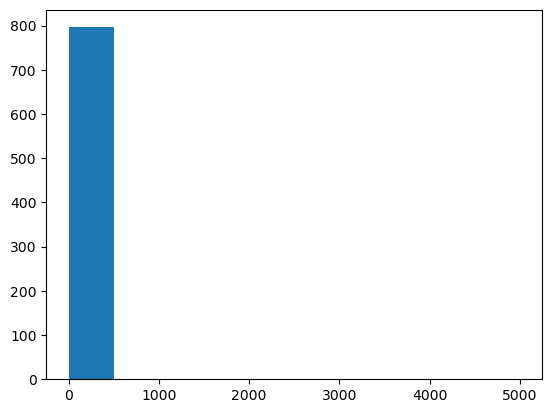

In [6]:
# Rajzoljuk ki a HP oszlop hisztogramját
# Itt látszik, hogy van egy nagyon kiugró értékünk

plt.hist(df['HP'])

In [7]:
# Megvan a problémás sor!

df[df['HP'] > 150]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
89,82,Magneton,Electric,Steel,465,5000.0,60,95.0,120,70.0,70.0,1,False
121,113,Chansey,Normal,NaN,450,250.0,5,5.0,35,105.0,50.0,1,False
155,143,Snorlax,Normal,NaN,540,160.0,110,65.0,65,110.0,30.0,1,False
217,202,Wobbuffet,Psychic,NaN,405,190.0,33,58.0,33,58.0,33.0,2,False
261,242,Blissey,Normal,NaN,540,255.0,10,10.0,75,135.0,55.0,2,False
351,321,Wailord,Water,NaN,500,170.0,90,45.0,90,45.0,60.0,3,False
655,594,Alomomola,Water,NaN,470,165.0,75,80.0,40,45.0,65.0,5,False


In [8]:
# Javjtsuk ki a hibát!

df.at[89, 'HP'] = df['HP'].mean()

(array([ 10., 200., 335., 186.,  50.,  10.,   3.,   1.,   0.,   2.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <BarContainer object of 10 artists>)

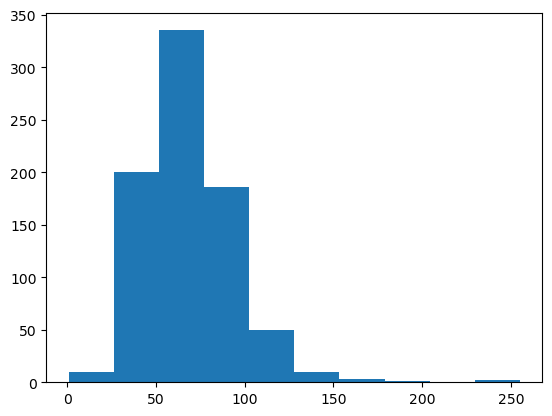

In [9]:
# Mostmár jól néz ki a hisztogram

plt.hist(df['HP'])

In [10]:
# Vizsgáljuk meg vannak-e hiányzó értékek

# Mit tegyünk?
# Dobjuk el a sorokat
# Töltsük fel valamilyen konstans értékkel
# Próbáljuk kitalálni nagyjából milyen érték szerepelhet ott

df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              3
Attack          0
Defense         1
Sp. Atk         0
Sp. Def         1
Speed           1
Generation      0
Legendary       0
dtype: int64

In [11]:
# Ezeket most nem hajtom végre, később kezelem a hiányzó értékeket!

# Konstanssal való kitöltés
df.fillna(value=0)
# A rákövetkező lévő sorban lévő értékkel kitöltése
df.fillna(method='ffill')
# Az oszlop átlagával történő kitöltés
df['HP'].fillna(df['HP'].mean())

# Ha a fillna() függvénynek megadjuk az inplace=True paramétert, akkor módosítja a dataframe-et

0      45.0
1      60.0
2      80.0
3      80.0
4      39.0
       ... 
795    50.0
796    50.0
797    80.0
798    80.0
799    80.0
Name: HP, Length: 800, dtype: float64

## Adatok átalakítása

In [12]:
# Könyvtár gépi tanulás algorimtusokhoz
# Preprocessing - előfeldolgozási algoritmusok

# Telepítés: !pip install scikit-learn

from sklearn import preprocessing

In [13]:
# A típus különböző kategóriákat jelöl. Hogyan lehetne ezt numerikus típusú oszloppá alakítani?

df['Type 1']

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

In [14]:
# OrdinalEncoder
# A különböző típusokat számokkal helyettesíti

enc = preprocessing.OrdinalEncoder()
encoded = enc.fit_transform(df[['Type 1']])
encoded[:15]

array([[ 9.],
       [ 9.],
       [ 9.],
       [ 9.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [17.],
       [17.],
       [17.],
       [17.],
       [ 0.],
       [ 0.]])

In [15]:
# One Hot Encoding pandassal
# Egy oszlopból annyi oszlopot készít, ahány különböző érték előfordul benne
# get_dummies()

cols = pd.get_dummies(df['Type 1'], prefix='Type1')
cols

,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
# One Hot Encoding sklearnnel

enc = preprocessing.OneHotEncoder()
encoded = enc.fit_transform(df[['Type 1']])
encoded.toarray()[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]])

In [17]:
# Adatok binelése (diszkretizálás) kvantilisek alapján

my_labels = ['Elso', 'Masodik', 'Harmadik', 'Negyedik']
pd.qcut(df['Attack'], q=4, labels=my_labels)

0          Elso
1       Masodik
2      Harmadik
3      Harmadik
4          Elso
         ...   
795    Harmadik
796    Negyedik
797    Negyedik
798    Negyedik
799    Negyedik
Name: Attack, Length: 800, dtype: category
Categories (4, object): ['Elso' < 'Masodik' < 'Harmadik' < 'Negyedik']

In [18]:
# Binelés a határok megadásával

my_bins = [0, 50, 100, 150, 200]
pd.cut(df['Attack'], bins=my_bins, labels=my_labels)

0          Elso
1       Masodik
2       Masodik
3       Masodik
4       Masodik
         ...   
795     Masodik
796    Negyedik
797    Harmadik
798    Negyedik
799    Harmadik
Name: Attack, Length: 800, dtype: category
Categories (4, object): ['Elso' < 'Masodik' < 'Harmadik' < 'Negyedik']

## Modell készítése

In [19]:
# Vállasszuk ki azokat az attribútumokat, amelyekre valóban szükségünk van
# Határozzuk meg melyik attribútum lesz az osztálycímke

features = ['HP', 'Attack', 'Defense', 'Speed', 'Generation']
label = 'Legendary'
feat_data = df[features].copy()
label_data = df[label].copy()
feat_data

,HP,Attack,Defense,Speed,Generation
0,45.0,49,49.0,45.0,1
1,60.0,62,63.0,60.0,1
2,80.0,82,83.0,80.0,1
3,80.0,100,123.0,80.0,1
4,39.0,52,43.0,65.0,1
...,...,...,...,...,...
795,50.0,100,150.0,50.0,6
796,50.0,160,110.0,110.0,6
797,80.0,110,60.0,70.0,6
798,80.0,160,60.0,80.0,6


In [20]:
# Kezeljük a hiányzó értékeket

feat_data[features].isnull().sum()

HP            3
Attack        0
Defense       1
Speed         1
Generation    0
dtype: int64

In [21]:
# Hiányzó érték helyettesítése az oszlop átlagával

feat_data['Defense'].fillna(feat_data['Defense'].mean(), inplace=True)
feat_data['Speed'].fillna(feat_data['Speed'].mean(), inplace=True)
feat_data['HP'].fillna(feat_data['Speed'].mean(), inplace=True)

In [22]:
# Eltűntek a hiányzó értékek

feat_data.isnull().sum()

HP            0
Attack        0
Defense       0
Speed         0
Generation    0
dtype: int64

In [23]:
# Az adatunkat felbontjuk tanító és tesztelő halmazra

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape) # 640 tanító rekord
print(X_test.shape) # 160 tesztelő rekord

(640, 5)
(160, 5)


In [25]:
# K-legközelebbi szomszéd osztályozó létrehozása

from sklearn import neighbors

n_neighbors = 10

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)
clf

KNeighborsClassifier(n_neighbors=10)

In [26]:
# Egy sor osztályozása
# clf.predict([[106,110,90,130,1]])

data = pd.DataFrame({'HP': [106], 'Attack': [110], 'Defense': [90], 'Speed': [130], 'Generation': [1]})
clf.predict(data)

array([ True])

In [27]:
# Osztályozzuk a tesztelésre elkülönített adatunkat

prediction = clf.predict(X_test)
prediction

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
## Feladat (accuracyt implementálni)

# Írjunk egy programot, ami megadja, hogy az esetek hány százalékában sikerült helyesen osztályozni!
# Ehhez hasonlítsuk össze a predikciókat a biztosan helyen értékekkel.

In [29]:
helyes = 0
hamis = 0
for i in range(len(prediction)):
    if prediction[i] == y_test.iloc[i]:
        helyes += 1
    else:
        hamis += 1
acc = helyes/(hamis+helyes)
print('Accuracy: ' + str(acc))

Accuracy: 0.925


In [30]:
# Sklearn implementáció accuracy-ra

from sklearn import metrics as ms

print ("Accuracy:", ms.accuracy_score(y_test.values, prediction))

# Vagy használhatjuk a KNN beépített függvényét
# clf.score(X_test, y_test)

Accuracy: 0.925


In [31]:
# KNN osztályozónk paraméterezése
# A weights paraméternek megadhatjuk, hogy súlyozza-e a szomszédokat és ha igen, akkor hogyan
# A metric paraméterbenm egadhatjuk a távolságfüggvényt
# A p paraméter a távolságfüggvényt paraméterezi

n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric='minkowski', p=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.925

In [32]:
## Feladat 1.

# Írjunk egy programot, amelyek elkészít egy KNN osztályozót különböző szomszédság számossággal (pl. 1-15).
# Nézzük meg, hogy milyen pontos az osztályozó az egyes esetekben.
# Mutassuk meg az eredményt ábra segítségével.

## Feladat 2.

# Az előző feladatban ne csak a szomszédság méretét változtassuk, hanem a súlyozást és a távolságmetrikát is.
# Hogyan tudjuk elérni a legnagyobb pontosságot?

## Feladat 3.

# Vizsgáljuk meg, hogy további attribútomok alapján tudunk-e pontosabb osztályozót készíteni.

[ True]


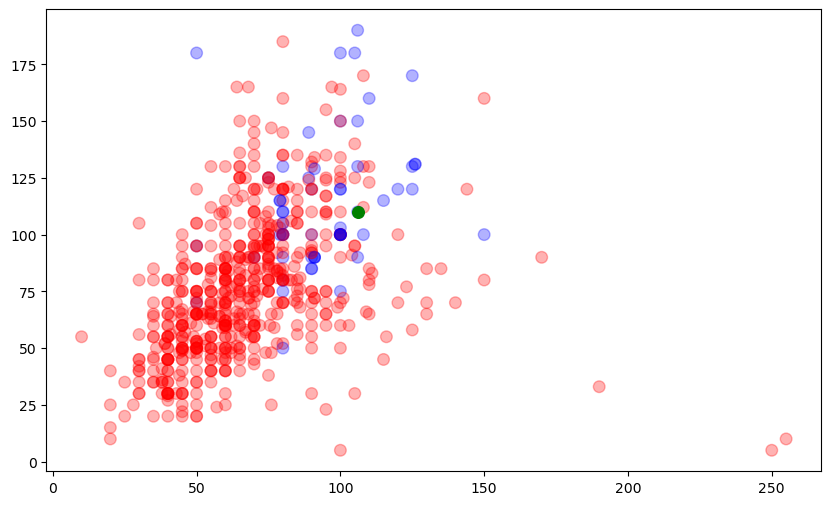

In [33]:
# Pontok kirajzolása az osztálycímke alapján

n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric='minkowski', p=2)
clf.fit(X_train, y_train)

new_pokemon = pd.DataFrame({'HP': [106], 'Attack': [110], 'Defense': [90], 'Speed': [130], 'Generation': [1]})
pred_label = clf.predict(new_pokemon)

colors = y_train.apply(lambda c: 'blue' if c is True else 'red')

plt.figure(figsize=(10,6))
plt.scatter(X_train['HP'], X_train['Attack'], c=colors, alpha=0.3, s=70)
plt.scatter(new_pokemon.loc[0]['HP'], new_pokemon.loc[0]['Attack'], c='green', s=70)
print(pred_label)

In [34]:
# Döntési fa létrehozása

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
features

['HP', 'Attack', 'Defense', 'Speed', 'Generation']

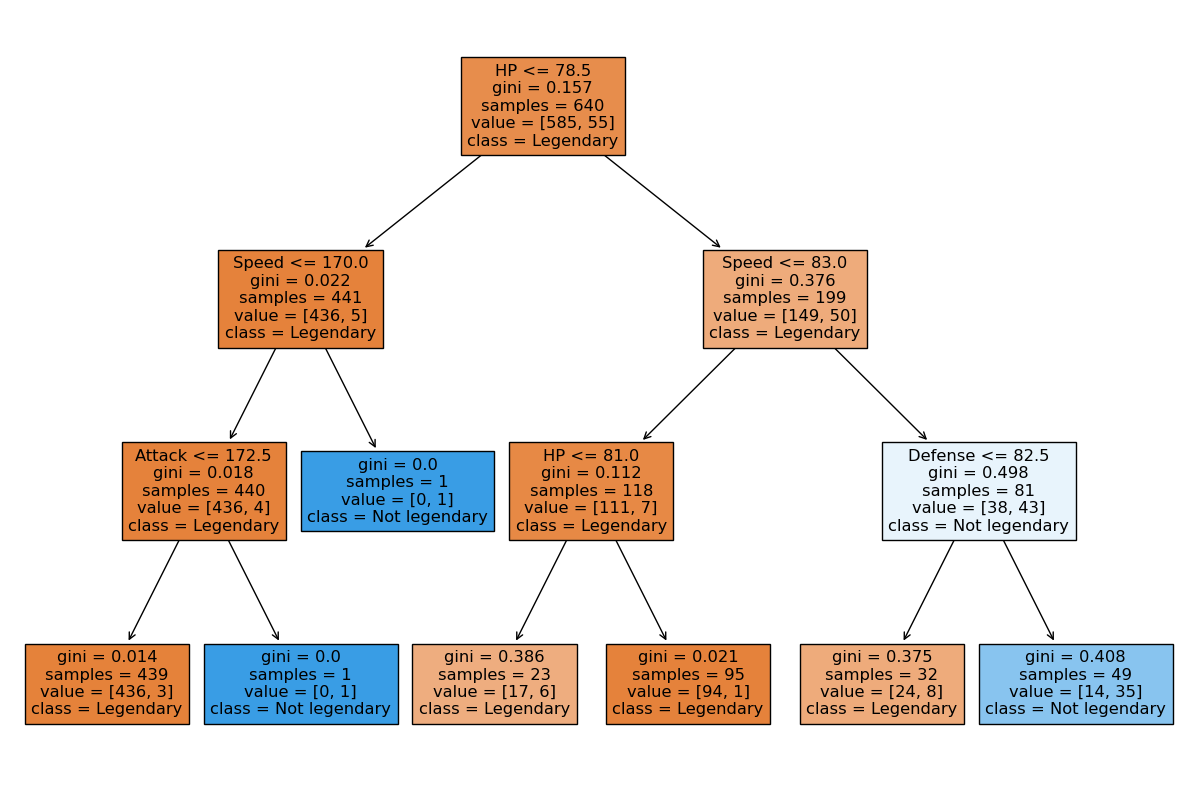

In [36]:
# Döntési fa kirajzolása

from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=['Legendary', 'Not legendary'],
                   filled=True)

In [37]:
# Pontosság számolás

prediction = clf.predict(X_test)
print ("Accuracy:", ms.accuracy_score(y_test.values, prediction))

Accuracy: 0.94375


In [38]:
# Komplexebb kiértékelés - cross-validation

from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.90625  0.90625  0.921875 0.921875 0.921875 0.9375   0.953125 0.953125
 0.96875  0.96875 ]
0.9359375
